In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

**Kết quả từ phân tích trước đó**

Theo như kết quả từ việc phân tích các feature đã làm trước đó, nhóm đã rút ra được 10 features có ảnh hưởng đến khả năng dự đoán của mô hình. Từ bộ dữ liệu ban đầu, nhóm đã rút các features không cần thiết để tạo nên bộ dữ liệu chỉ chứa các features cần thiết để tạo nên một mô hình scorecard để phục vụ cho việc xét duyệt khoản vay

In [2]:
data = pd.read_csv("./cleaned_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   20000 non-null  int64  
 1   label                         20000 non-null  int64  
 2   NUMBER_OF_LOANS               20000 non-null  float64
 3   NUMBER_OF_RELATIONSHIP_BANK   20000 non-null  float64
 4   NUM_NEW_LOAN_TAKEN_12M        20000 non-null  float64
 5   NUM_NEW_LOAN_TAKEN_BANK_12M   20000 non-null  float64
 6   OUTSTANDING_BAL_LOAN_CURRENT  20000 non-null  float64
 7   OUTSTANDING_BAL_LOAN_6M       20000 non-null  float64
 8   OUTSTANDING_BAL_ALL_3M        20000 non-null  float64
 9   OUTSTANDING_BAL_ALL_3M_6M     20000 non-null  float64
 10  ENQUIRIES_FROM_NON_BANK_3M    20000 non-null  float64
 11  ENQUIRIES_FROM_BANK_3M_6M     20000 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 1.8 MB


In [4]:
data.head(10)

,customer_id,label,NUMBER_OF_LOANS,NUMBER_OF_RELATIONSHIP_BANK,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
0,1639,1,1.00,1.00,1.00,1.00,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00",7.00,-3.00
1,23717,0,10.00,13.00,13.00,13.00,"1,000,250.00","1,000,165.00","1,000,433.33","1,000,013.54",12.00,-3.00
2,19474,0,13.00,16.00,13.00,13.00,"1,000,360.00","1,000,323.33","1,000,606.67","1,000,011.63",12.00,7.00
3,15505,0,7.00,7.00,4.00,4.00,"1,000,040.00","1,000,040.00","1,000,096.67","1,000,009.83",7.00,4.22
4,1538,1,8.42,1.00,4.00,4.00,"1,000,200.00","1,000,141.67","1,000,792.30","1,000,012.61",7.00,2.00
5,8455,0,4.00,7.00,4.00,4.00,"1,000,100.00","1,000,016.67","1,000,036.67","1,000,016.92",7.00,-3.00
6,20339,0,13.00,16.00,7.00,7.00,"1,001,670.00","1,001,286.67","1,001,433.33","1,000,007.74",7.00,3.11
7,6629,0,19.00,7.00,22.00,22.00,"1,000,450.00","1,000,253.33","1,000,246.67","1,000,009.74",12.00,-3.00
8,9850,0,7.00,4.00,7.00,7.00,"1,000,290.00","1,000,075.00","1,000,166.67","1,000,018.52",7.00,-3.00
9,22474,0,10.00,7.00,10.00,10.00,"1,000,260.00","1,000,131.67","1,000,170.00","1,000,011.59",12.00,-3.00


In [5]:
data.describe()

,customer_id,label,NUMBER_OF_LOANS,NUMBER_OF_RELATIONSHIP_BANK,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
count,"20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00"
mean,"12,805.81",0.18,8.42,6.89,7.36,7.36,"1,000,703.40","1,000,611.82","1,000,792.30","1,000,010.88",9.98,0.50
std,"7,405.23",0.39,4.65,6.31,4.53,4.53,"3,738.55","3,352.30","3,231.56",4.48,4.55,3.92
min,0.00,0.00,1.00,1.00,1.00,1.00,"1,000,000.00","999,588.33","1,000,000.00","999,990.00",2.00,-3.00
25%,"6,374.75",0.00,4.00,4.00,4.00,4.00,"1,000,070.00","1,000,043.33","1,000,073.33","1,000,009.15",7.00,-3.00
50%,"12,840.50",0.00,7.00,4.00,7.00,7.00,"1,000,190.00","1,000,130.00","1,000,240.00","1,000,010.74",7.00,-3.00
75%,"19,206.25",0.00,10.00,10.00,10.00,10.00,"1,000,480.00","1,000,420.00","1,000,713.33","1,000,012.50",12.00,3.16
max,"25,659.00",1.00,34.00,61.00,76.00,76.00,"1,169,190.00","1,150,055.00","1,150,050.00","1,000,020.00",67.00,7.00


In [6]:
label_0=data[data["label"]==0]
label_1=data[data["label"]==1]
n=len(label_0)/len(data["label"])
n_1=len(label_1)/len(data["label"])
print(f"Số khách hàng trả nợ đúng hạn {len(label_0)}")
print(f"Số khách hàng quá hạn trả nợ {len(label_1)}")
print(f"Tỷ lệ số khách hàng trả nợ đúng hạn trên tổng số khách hàng: {n}")
print(f"Tỷ lệ số khách hàng quá hạn trả nợ trên tổng số khách hàng: {n_1}")

Số khách hàng trả nợ đúng hạn 16356
Số khách hàng quá hạn trả nợ 3644
Tỷ lệ số khách hàng trả nợ đúng hạn trên tổng số khách hàng: 0.8178
Tỷ lệ số khách hàng quá hạn trả nợ trên tổng số khách hàng: 0.1822


## Huấn luyện mô hình

**Phân tích độ tương quan giữa các biến**

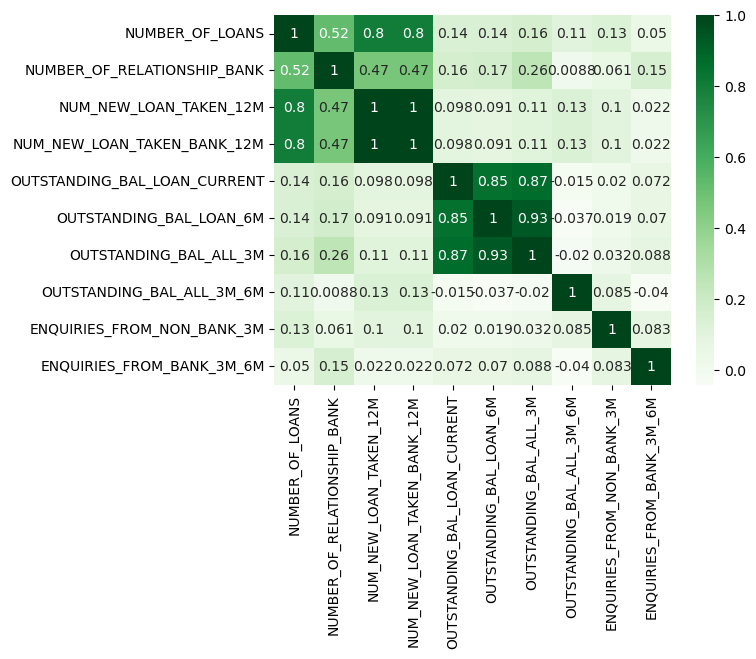

In [7]:
corr_data = data.drop(columns=['customer_id','label']).corr()
sns.heatmap(corr_data, annot=True, cmap='Greens')
plt.savefig('.\correlation_heatmap.png',bbox_inches='tight')
plt.show()

In [8]:
X_1 = data.drop(columns=['customer_id','label'])
y_1 = data['label']
X_1.head(10)

,NUMBER_OF_LOANS,NUMBER_OF_RELATIONSHIP_BANK,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
0,1.00,1.00,1.00,1.00,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00",7.00,-3.00
1,10.00,13.00,13.00,13.00,"1,000,250.00","1,000,165.00","1,000,433.33","1,000,013.54",12.00,-3.00
2,13.00,16.00,13.00,13.00,"1,000,360.00","1,000,323.33","1,000,606.67","1,000,011.63",12.00,7.00
3,7.00,7.00,4.00,4.00,"1,000,040.00","1,000,040.00","1,000,096.67","1,000,009.83",7.00,4.22
4,8.42,1.00,4.00,4.00,"1,000,200.00","1,000,141.67","1,000,792.30","1,000,012.61",7.00,2.00
5,4.00,7.00,4.00,4.00,"1,000,100.00","1,000,016.67","1,000,036.67","1,000,016.92",7.00,-3.00
6,13.00,16.00,7.00,7.00,"1,001,670.00","1,001,286.67","1,001,433.33","1,000,007.74",7.00,3.11
7,19.00,7.00,22.00,22.00,"1,000,450.00","1,000,253.33","1,000,246.67","1,000,009.74",12.00,-3.00
8,7.00,4.00,7.00,7.00,"1,000,290.00","1,000,075.00","1,000,166.67","1,000,018.52",7.00,-3.00
9,10.00,7.00,10.00,10.00,"1,000,260.00","1,000,131.67","1,000,170.00","1,000,011.59",12.00,-3.00


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)
model = AdaBoostClassifier(algorithm='SAMME')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

True positives: 418
False positives: 1
True negatives: 4910
False negatives: 671

Accuracy: 0.888
Precision: 0.9976133651551312
Recall: 0.3838383838383838


In [10]:
feature_importances = pd.DataFrame({
    'features': X_test.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index(drop=True)

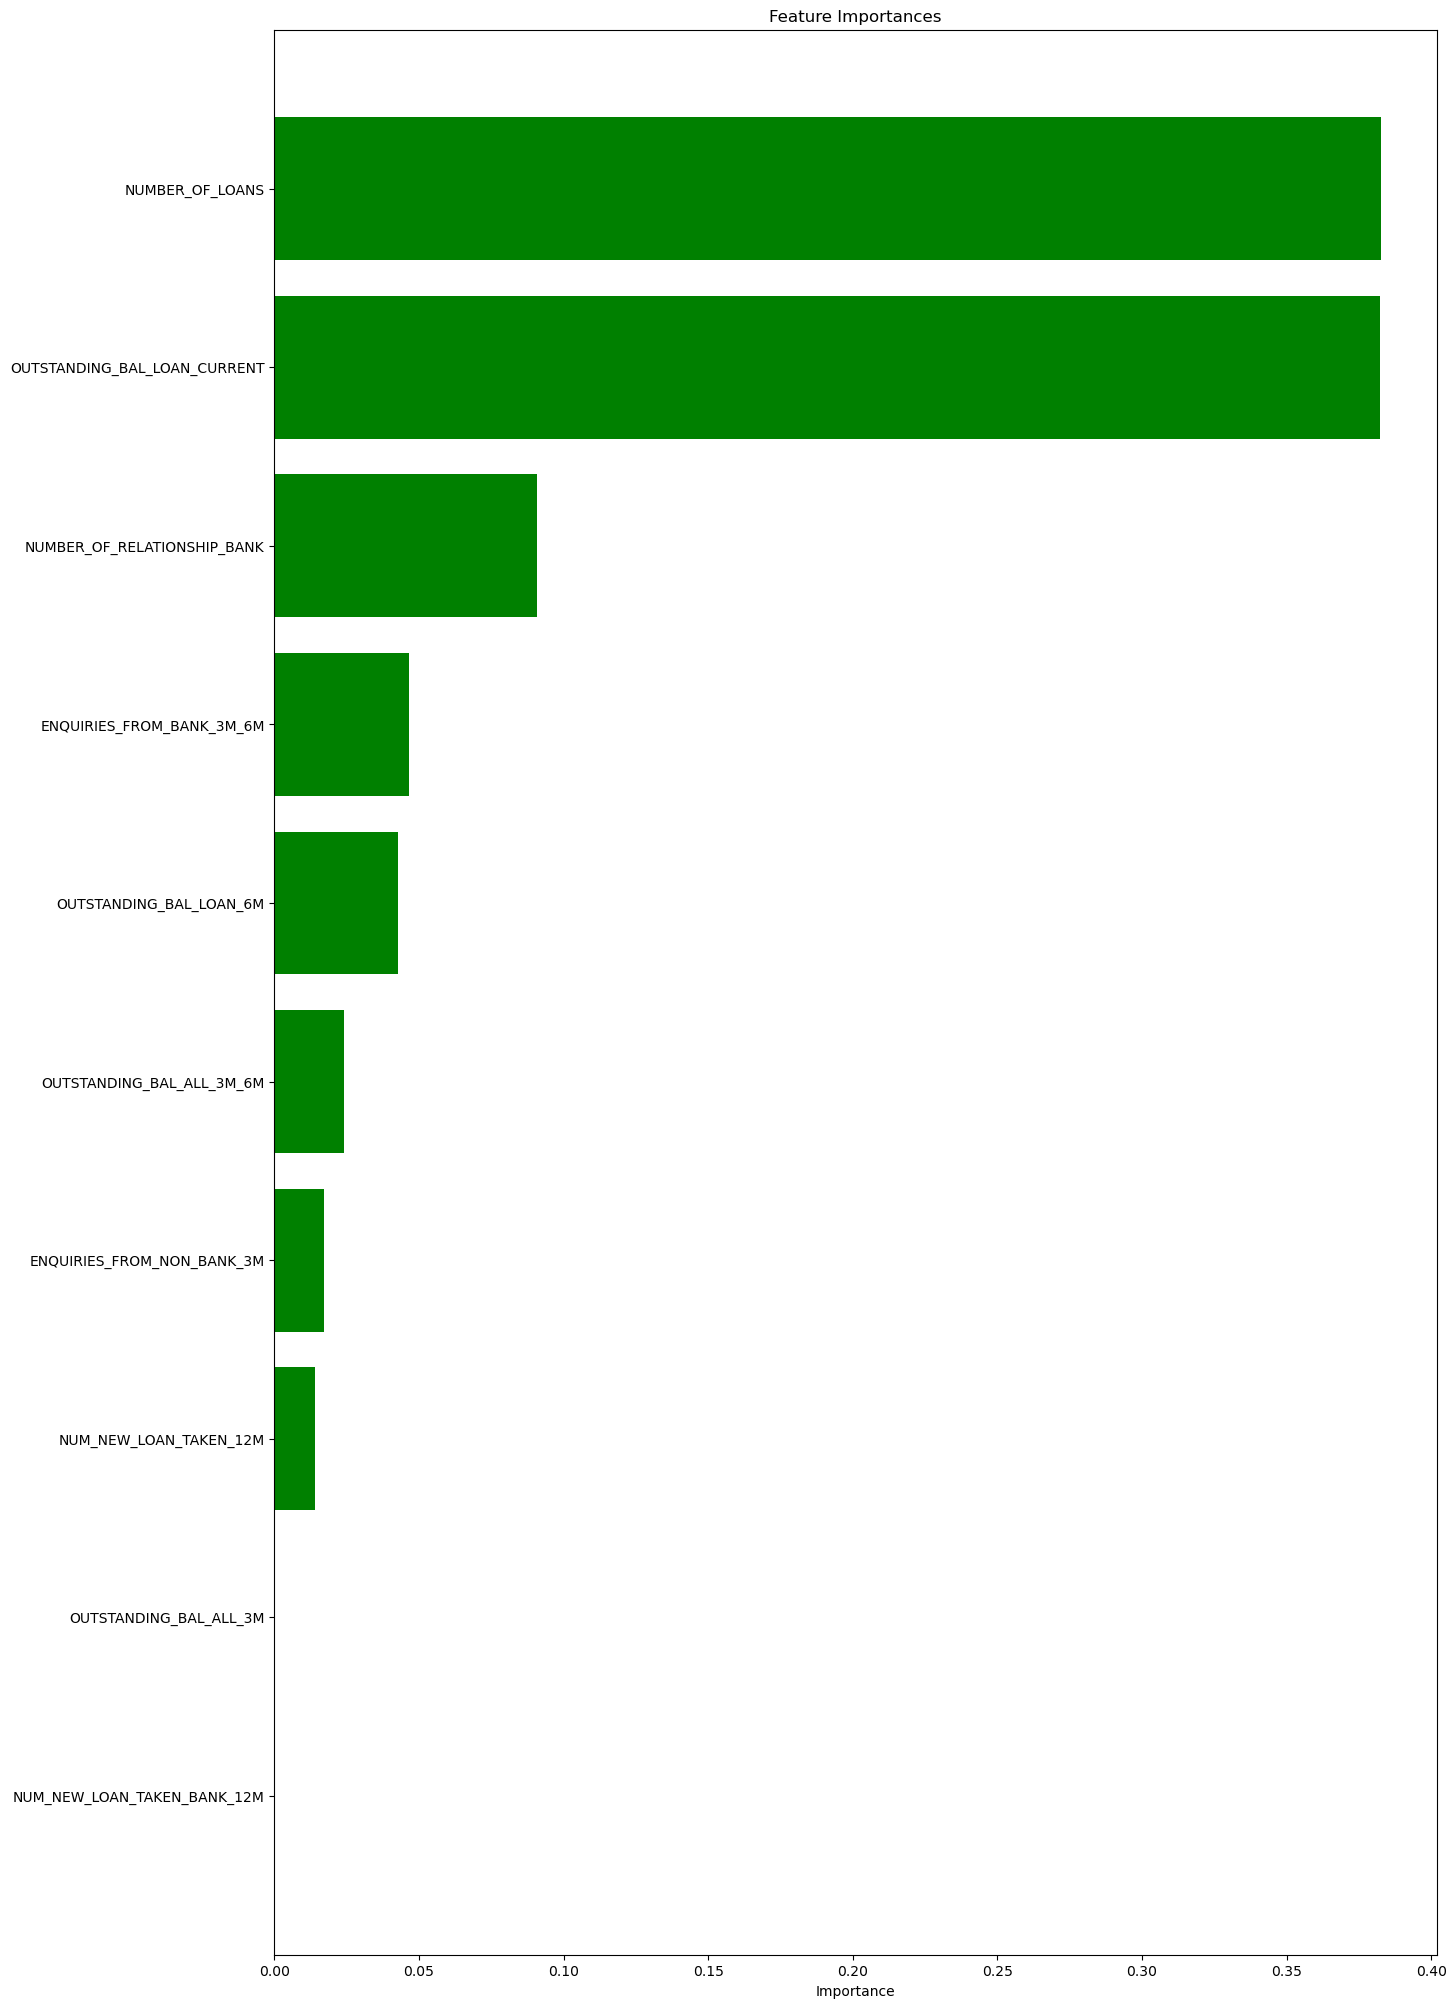

In [11]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='green', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.savefig('.\Feature Importance 2.png',bbox_inches='tight')
plt.show()

Từ biểu đồ heatmap và biểu đồ cột thể hiện mức độ quan trọng của các features trong việc đưa ra quyết định của mô hình, có thể kết luận rằng các features: 'OUTSTANDING_BAL_ALL_3M','NUM_NEW_LOAN_TAKEN_BANK_12M','NUM_NEW_LOAN_TAKEN_12M','NUMBER_OF_RELATIONSHIP_BANK',
'OUTSTANDING_BAL_LOAN_6M' tạo các mối quan hệ có độ tương quan cao (>50%) với nhau và với các features khác, tuy nhiên lại không tạo đóng góp đáng kể vào việc ra quyết định của mô hình. Vậy nên nhóm quyết định loại bỏ các features này

In [12]:
data = data.drop(columns=['OUTSTANDING_BAL_ALL_3M','NUM_NEW_LOAN_TAKEN_BANK_12M','NUM_NEW_LOAN_TAKEN_12M','NUMBER_OF_RELATIONSHIP_BANK','OUTSTANDING_BAL_LOAN_6M'])
X = data.drop(columns=['customer_id','label'])
y = data['label']

Huấn luyện lại mô hình AdaBoost Classifier sau khi đã loại bỏ các features có độ tương quan cao

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = AdaBoostClassifier(algorithm='SAMME')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

True positives: 418
False positives: 1
True negatives: 4910
False negatives: 671

Accuracy: 0.888
Precision: 0.9976133651551312
Recall: 0.3838383838383838


Có thể thấy độ chính xác của mô hình không thay đổi nên có thể kết luận rằng việc bỏ bớt các biến đó không ảnh hưởng đến mô hình

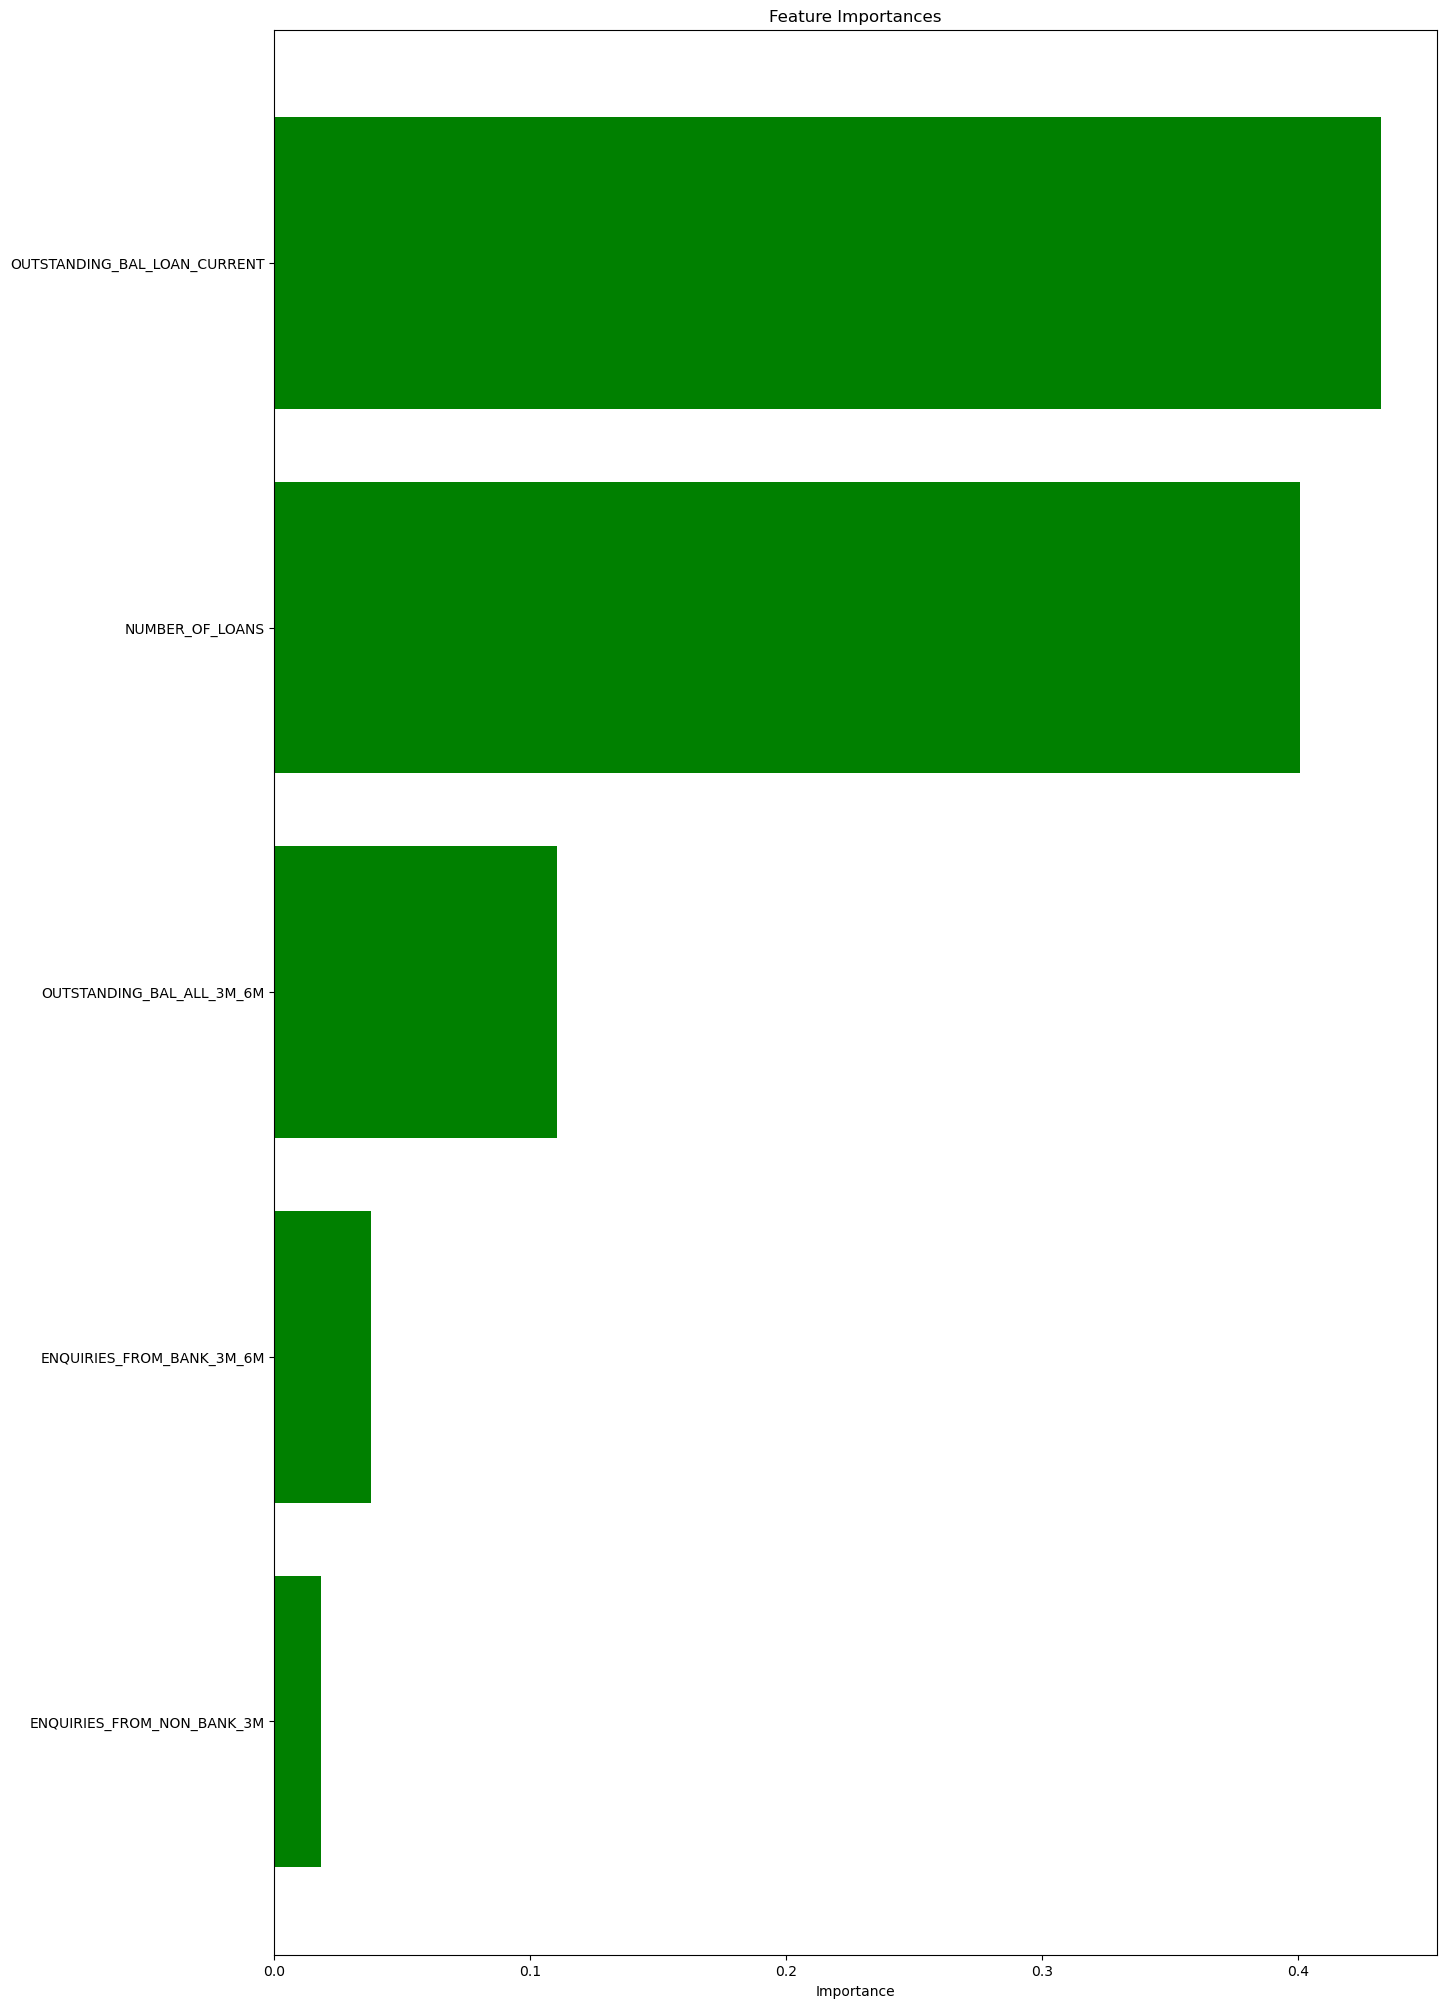

In [14]:
feature_importances = pd.DataFrame({
    'features': X_test.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index(drop=True)

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='green', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.savefig('.\Feature Importance Final.png',bbox_inches='tight')
plt.show()

In [15]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * auc - 1
print(f"Chỉ số AUC: {auc:.4f}")
print(f"Chỉ số GINI: {gini:.4f}")

Chỉ số AUC: 0.7710
Chỉ số GINI: 0.5420


Chỉ số GINI là một cách để đánh giá hiệu suất của mô hình phân loại, đặc biệt trong các bài toán về rủi ro tín dụng hoặc tài chính. Chỉ số này có liên hệ chặt chẽ với AUC

### 1. **Giải thích chỉ số GINI**
- **GINI = 0**: Mô hình không có khả năng phân biệt giữa hai lớp (tương đương với AUC = 0.5).
- **GINI = 1**: Mô hình hoàn hảo trong việc phân loại hai lớp.
- **GINI = -1**: Mô hình dự đoán hoàn toàn ngược lại (nghĩa là khi mô hình dự đoán "không trả được nợ" thì khách hàng thực tế lại trả nợ và ngược lại).

Với chỉ số **GINI = 0.5420**, mô hình thể hiện một mức độ **phân biệt tốt** giữa hai lớp (khách hàng trả được nợ và không trả được nợ). Tuy nhiên, nó không hoàn hảo.

### 2. **So sánh hiệu suất**
- **GINI trong ngành tài chính**: Trong lĩnh vực tín dụng và tài chính, chỉ số GINI từ **0.5 trở lên** thường được coi là tốt và đáng tin cậy. Một mô hình có GINI = 0.5420 sẽ được đánh giá là khá tốt và có thể sử dụng để dự đoán rủi ro tín dụng.
- **GINI dưới 0.3** thường được coi là yếu, và từ **0.6 trở lên** được coi là mạnh.

### 3. **Ý nghĩa kinh doanh**
- **Khả năng phân loại**: Với GINI = 0.5420, mô hình đã đạt đến mức độ phân loại tốt trong việc xác định khách hàng không trả được nợ. Điều này có thể giúp giảm thiểu rủi ro tín dụng và tối ưu hóa việc cho vay.

### Tổng kết:
Với chỉ số GINI = 0.5420, mô hình hoạt động khá tốt và có khả năng phân loại chính xác hai lớp khách hàng (trả nợ và không trả nợ).

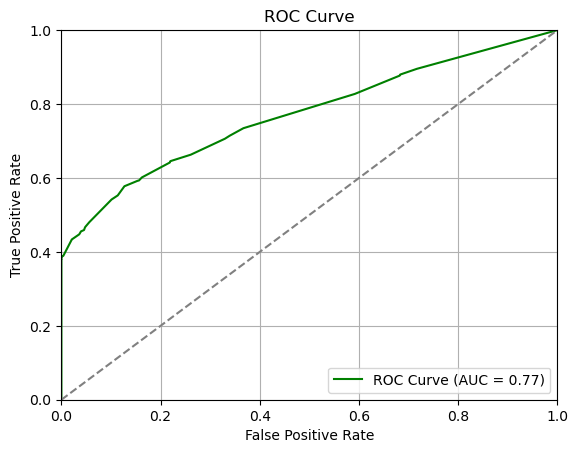

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('./ROC Curve.png',bbox_inches='tight')
plt.show()

### 1. **Tỷ lệ Dương tính thật (True Positive Rate - TPR)**
- **Trục tung** biểu thị TPR, tức là tỷ lệ khách hàng **không trả được nợ**  mà mô hình dự đoán đúng. 
- TPR = TP / (TP + FN), trong đó TP (True Positive) là số khách hàng không trả được nợ mà mô hình dự đoán đúng, và FN (False Negative) là số khách hàng không trả được nợ nhưng bị dự đoán sai là trả được nợ.

### 2. **Tỷ lệ Dương tính giả (False Positive Rate - FPR)**
- **Trục hoành** biểu thị FPR, tức là tỷ lệ khách hàng **trả được nợ** (gán nhãn 0) nhưng mô hình dự đoán sai là không trả được nợ.
- FPR = FP / (FP + TN), trong đó FP (False Positive) là số khách hàng trả được nợ nhưng bị dự đoán sai là không trả được nợ, và TN (True Negative) là số khách hàng trả được nợ và được dự đoán đúng.

### 3. **Đường cong ROC**
- **Đường cong màu xanh** biểu diễn sự cân bằng giữa TPR và FPR ở các ngưỡng phân loại khác nhau của mô hình. Đường cong ROC tiến gần góc trên bên trái của biểu đồ, thể hiện TPR cao và FPR thấp.
- **Đường chéo** (đường gạch đứt xám) là đường ROC của một mô hình phân loại ngẫu nhiên với AUC = 0.5. Đường này đại diện cho một mô hình không phân biệt được khách hàng nào sẽ trả được nợ hay không, vì TPR và FPR đều tăng đều nhau.
- Đường cong nằm trên đường chéo, thể hiện rằng mô hình có khả năng phân loại tốt hơn ngẫu nhiên.
### 4. **AUC = 0.77**
- **AUC** (Area Under the Curve) là diện tích dưới đường cong ROC, biểu thị khả năng tổng thể của mô hình trong việc phân loại đúng khách hàng.
  - AUC = 1: Mô hình hoàn hảo (không có lỗi phân loại).
  - AUC = 0.5: Mô hình tệ như đoán ngẫu nhiên.
  - **AUC = 0.77** cho thấy mô hình của bạn có khả năng phân biệt **77%** giữa hai lớp (khách hàng trả nợ và không trả được nợ). Mức này là **khá tốt**, nhưng vẫn có một số lỗi phân loại, đặc biệt là đối với một số ngưỡng phân loại nhất định.

### 5. **Ý nghĩa đối với kinh doanh**
- **Tỷ lệ Dương tính giả (FPR)** cao sẽ dẫn đến việc từ chối khách hàng trả nợ đúng, gây thiệt hại cho doanh nghiệp do mất doanh thu.
- **Tỷ lệ Dương tính thật (TPR)** cao là điều mong muốn vì nó giúp doanh nghiệp phát hiện chính xác khách hàng không trả được nợ, giảm rủi ro tín dụng.
- Tuy nhiên, với AUC = 0.77, mô hình vẫn có thể bị nhầm lẫn một số khách hàng tiềm năng (trả nợ đúng) thành khách hàng rủi ro (không trả nợ), và ngược lại.

Tóm lại, mô hình hiện tại hoạt động khá tốt, nhưng vẫn có thể gây ra một số sai sót trong việc phân loại khách hàng.

### Phân đoạn dữ liệu
Để tạo mô hình chấm điểm scorecard, việc cần làm trước tiên là chia các features có dữ liệu liên tục thành các bin (nhóm nhỏ)

In [17]:
binned_data = pd.DataFrame()
for col in X.columns:
    binned_data[col] = pd.cut(data[col], bins=5)
X_train_binned, X_test_binned, y_train, y_test = train_test_split(binned_data, y, test_size=0.3, random_state=42)

In [18]:
base_score = 600
pdo = 20
factor = pdo / np.log(2)
offset = base_score - (factor * np.log(50))

### 1. **base_score (Hệ số gốc)**:
- **Ý nghĩa**: `base_score` là **điểm tín dụng gốc** hoặc điểm chuẩn. Biến này được dùng làm cơ sở để tính toán điểm tín dụng cuối cùng của khách hàng.

### 2. **pdo (Points to Double Odds - Số điểm tăng gấp đôi tỷ lệ rủi ro)**:
- **Ý nghĩa**: `pdo` đại diện cho **số điểm cần thay đổi để tăng gấp đôi tỷ lệ rủi ro (odds)**. Tức là, nếu giảm điểm tín dụng của khách hàng xuống **20 điểm**, thì tỷ lệ rủi ro (khả năng khách hàng trả nợ so với khả năng không trả nợ) sẽ **tăng gấp đôi**. Ngược lại, nếu tăng 20 điểm, tỷ lệ rủi ro sẽ **giảm một nửa**.
- **Sử dụng**: PDO giúp điều chỉnh sự thay đổi điểm tín dụng dựa trên mức độ rủi ro thay đổi.
### 3. **factor (Hệ số điều chỉnh dựa trên PDO)**:
- **Ý nghĩa**: `factor` là **hệ số điều chỉnh** được tính từ PDO, giúp chuyển đổi **logarit của tỷ lệ rủi ro (odds)** thành một điểm tín dụng. `factor` giúp tính toán điểm tín dụng tương ứng dựa trên tỷ lệ rủi ro thay đổi của khách hàng.

### 4. **offset (Hệ số bù)**:
- **Ý nghĩa**: `offset` là **hệ số bù**, được sử dụng để đảm bảo rằng khi tỷ lệ rủi ro (odds) là một giá trị cố định, thì điểm tín dụng của khách hàng sẽ là **base_score**. `offset` giúp đảm bảo rằng hệ thống điểm tín dụng bắt đầu từ một điểm cố định, và mọi thay đổi dựa trên tỷ lệ rủi ro sẽ được điều chỉnh tương ứng.

### Công thức tổng quát tính **Điểm tín dụng**:
Kết hợp tất cả các biến lại, công thức tính điểm tín dụng cuối cùng sẽ là:

Điểm tín dụng = offset + factor * ln(odds)

Trong đó:
- **`offset`** điều chỉnh điểm tín dụng để khởi điểm từ mức chuẩn (600).
- **`factor`** quy đổi logarit của tỷ lệ rủi ro thành giá trị điểm tín dụng.
- **`odds`** là tỷ lệ giữa khả năng không trả nợ và trả nợ của khách hàng.

In [19]:
def calculate_adaboost_score(model, base_score, pdo, X):
    factor = pdo / np.log(2)
    offset = base_score - factor * np.log(50)
    estimator_weights = model.estimator_weights_
    scores = []
    for i in range(X.shape[0]):
        sample_score = offset
        for j, estimator in enumerate(model.estimators_):
            weak_pred = estimator.predict([X.iloc[i]])[0]
            sample_score += factor * estimator_weights[j] * weak_pred
        scores.append(sample_score)
    return scores

customer_scores = calculate_adaboost_score(model, base_score, pdo, X_test)

Thực hiện **tính toán điểm tín dụng** cho khách hàng dựa trên mô hình **AdaBoost**, theo công thức liên quan đến **base score** (hệ số gốc) và **PDO** (Points to Double Odds), sử dụng các bộ ước lượng yếu của mô hình.

#### 1. **Trọng số của các bộ ước lượng yếu trong mô hình AdaBoost**:
- **`model.estimator_weights_`**: Đây là trọng số của các bộ ước lượng yếu (weak learners) trong mô hình AdaBoost. Mỗi bộ ước lượng yếu (weak learner) đóng góp một phần khác nhau vào kết quả dự đoán, và trọng số này quyết định mức độ quan trọng của mỗi bộ ước lượng trong tổng điểm.
#### 2. **Tính toán điểm tín dụng cho từng khách hàng**:
- **Duyệt qua từng khách hàng**: 
  - Với mỗi khách hàng, bắt đầu tính **`sample_score`** từ **`offset`**.
- **Duyệt qua các bộ ước lượng yếu**:
  - **`weak_pred = estimator.predict([X.iloc[i]])[0]`**: Mỗi bộ ước lượng yếu **dự đoán** kết quả cho khách hàng thứ `i` trong tập **X_test**. Kết quả dự đoán sẽ là `0` (khách hàng trả nợ đúng hạn) hoặc `1` (không trả nợ).
  - **`factor * estimator_weights[j] * weak_pred`**: Tính toán điểm đóng góp từ bộ ước lượng yếu vào tổng điểm của khách hàng, bằng cách nhân trọng số của bộ ước lượng với **kết quả dự đoán** và **factor**.
- **Cộng dồn vào `sample_score`**:
  - Sau khi mỗi bộ ước lượng yếu dự đoán và trọng số được nhân vào, giá trị đó được cộng vào điểm tín dụng của khách hàng **`sample_score`**.
### Tổng kết:
Hàm **`calculate_adaboost_score`** tính toán điểm tín dụng cho mỗi khách hàng dựa trên mô hình **AdaBoost**. Điểm tín dụng được tính bằng cách kết hợp trọng số của các bộ ước lượng yếu (weak learners) với các dự đoán của từng bộ ước lượng cho khách hàng, sau đó điều chỉnh bằng hệ số **PDO** và **offset** để phản ánh khả năng trả nợ của khách hàng.

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
worst_threshold = thresholds[optimal_idx]

def probability_to_score(prob, base_score, pdo):
    factor = pdo / np.log(2)
    odds = (1 - prob) / prob
    score = base_score + factor * np.log(odds)
    return score

cutoff_probability = worst_threshold
cutoff_score = probability_to_score(cutoff_probability, base_score, pdo)

print(f"Ngưỡng xác suất cutoff xác định khách hàng không trả được nợ: {cutoff_probability:.2f}")
print(f"Số điểm tương đương: {cutoff_score:.2f}")

Ngưỡng xác suất cutoff xác định khách hàng không trả được nợ: 0.38
Số điểm tương đương: 613.99


In [21]:
approved_customers = []
rejected_customers = []

for score in customer_scores:
    if score >= cutoff_score:
        rejected_customers.append(score)
    else:
        approved_customers.append(score)

print(f"Số khách hàng được chấp nhận hoàn toàn: {len(approved_customers)}")
print(f"Số khách hàng có thể bị bị từ chối: {len(rejected_customers)}")

Số khách hàng được chấp nhận hoàn toàn: 5588
Số khách hàng có thể bị bị từ chối: 412


In [22]:
valid_thresholds = thresholds[(thresholds > 0) & (thresholds < 1)]
valid_youden_j = tpr[:len(valid_thresholds)] - fpr[:len(valid_thresholds)]
least_optimal_idx = np.argmin(valid_youden_j)
best_threshold = valid_thresholds[least_optimal_idx]
best_cutoff_score = probability_to_score(best_threshold, base_score, pdo)
print(f"Ngưỡng xác suất cutoff xác định khách hàng trả được nợ: {best_threshold:.2f}")
print(f"Số điểm tương đương: {best_cutoff_score:.2f}")

Ngưỡng xác suất cutoff xác định khách hàng trả được nợ: 0.87
Số điểm tương đương: 544.82


In [23]:
def classify_risk(score):
    if score >= cutoff_score:
        return 'Rủi ro cao'
    elif score >= best_cutoff_score:
        return 'Rủi ro trung bình'
    else:
        return 'Rủi ro thấp'
customer_risk_segments = [classify_risk(score) for score in customer_scores]
risk_counts = Counter(customer_risk_segments)
for i, (score, risk) in enumerate(zip(customer_scores, customer_risk_segments)):
    print(f"Khách hàng {i+1}: Điểm = {score}, Phân khúc rủi ro = {risk}")
print("Số khách hàng ở mỗi phân khúc rủi ro thuộc tập test:")
for risk, count in risk_counts.items():
    print(f"{risk}: {count} khách hàng")

Khách hàng 1: Điểm = 563.7926306757764, Phân khúc rủi ro = Rủi ro trung bình
Khách hàng 2: Điểm = 542.2148148548533, Phân khúc rủi ro = Rủi ro thấp
Khách hàng 3: Điểm = 661.7726988901524, Phân khúc rủi ro = Rủi ro cao
Khách hàng 4: Điểm = 556.7209283284168, Phân khúc rủi ro = Rủi ro trung bình
Khách hàng 5: Điểm = 549.286517202213, Phân khúc rủi ro = Rủi ro trung bình
Khách hàng 6: Điểm = 550.7198206995034, Phân khúc rủi ro = Rủi ro trung bình
Khách hàng 7: Điểm = 542.2148148548533, Phân khúc rủi ro = Rủi ro thấp
Khách hàng 8: Điểm = 551.3087550340632, Phân khúc rủi ro = Rủi ro trung bình
Khách hàng 9: Điểm = 542.2148148548533, Phân khúc rủi ro = Rủi ro thấp
Khách hàng 10: Điểm = 551.3087550340632, Phân khúc rủi ro = Rủi ro trung bình
Khách hàng 11: Điểm = 654.7009965427927, Phân khúc rủi ro = Rủi ro cao
Khách hàng 12: Điểm = 547.6269881492069, Phân khúc rủi ro = Rủi ro trung bình
Khách hàng 13: Điểm = 563.7926306757764, Phân khúc rủi ro = Rủi ro trung bình
Khách hàng 14: Điểm = 551.30

In [24]:
X_test['Risk Segment'] = customer_risk_segments
mean_features_by_risk = X_test.groupby('Risk Segment').mean()
std_features_by_risk = X_test.groupby('Risk Segment').std()

mean = pd.DataFrame(mean_features_by_risk)
std = pd.DataFrame(std_features_by_risk)
mean_std = mean.astype(str) + " ± " + std.astype(str)
mean_std = mean_std.applymap(lambda x: f"{float(x.split(' ± ')[0]):.2f} ± {float(x.split(' ± ')[1]):.2f}")
mean_std

,NUMBER_OF_LOANS,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
Risk Segment,,,,,
Rủi ro cao,1.09 ± 0.81,1000000.00 ± 0.00,1000003.76 ± 5.99,7.97 ± 5.80,2.00 ± 2.29
Rủi ro thấp,10.39 ± 3.90,1000714.29 ± 2885.76,1000009.74 ± 1.53,8.84 ± 2.39,-3.00 ± 0.00
Rủi ro trung bình,8.44 ± 4.33,1000710.12 ± 3542.89,1000012.17 ± 4.20,10.62 ± 4.89,1.58 ± 4.01


### 1. **NUMBER_OF_LOANS (Số lượng khoản vay)**:
- **Rủi ro cao**: Trung bình số lượng khoản vay là **1.09 ± 0.81**. Điều này cho thấy khách hàng có rủi ro cao thường chỉ có **1 khoản vay**, với mức độ biến động thấp.
- **Rủi ro trung bình**: Trung bình số lượng khoản vay là **8.44 ± 4.33**, cao hơn đáng kể so với nhóm rủi ro cao, với độ biến động lớn.
- **Rủi ro thấp**: Trung bình số lượng khoản vay là **10.39 ± 3.90**, thậm chí cao hơn nhóm rủi ro trung bình. Điều này cho thấy sự nghịch lý: **khách hàng có nhiều khoản vay nhưng rủi ro thấp**, có thể liên quan đến khả năng quản lý nợ tốt của họ.

### 2. **OUTSTANDING_BAL_LOAN_CURRENT (Số dư vay hiện tại)**:
- Các nhóm rủi ro có **số dư vay hiện tại** khá đồng đều, gần như ở mức **1,000,000**, với rất ít sự thay đổi.

### 3. **OUTSTANDING_BAL_ALL_3M_6M (Số dư vay 3-6 tháng trước)**:
- Nhìn chung, các nhóm có số dư trong khoảng **1,000,000** với rất ít biến động. Sự chênh lệch giữa số dư hiện tại và số dư trong quá khứ không đáng kể.

### 4. **ENQUIRIES_FROM_NON_BANK_3M (Số lượt tra cứu tín dụng liên quan đến tổ chức không phải ngân hàng trong 3 tháng)**:
- **Rủi ro cao**: Trung bình là **7.97 ± 5.80** lần. Khách hàng có rủi ro cao có xu hướng tìm kiếm nguồn tài chính từ các tổ chức không phải ngân hàng khá thường xuyên, nhưng có mức biến động cao.
- **Rủi ro trung bình**: Trung bình là **10.62 ± 4.89** lần, cao nhất trong các nhóm, cho thấy nhóm này có nhu cầu vay tín dụng từ các tổ chức không phải ngân hàng nhiều nhất.
- **Rủi ro thấp**: Trung bình là **8.84 ± 2.39** lần, cao hơn nhóm rủi ro cao nhưng có độ biến động nhỏ hơn. Điều này có thể cho thấy khách hàng rủi ro thấp cũng có nhu cầu vay tín dụng nhưng họ quản lý tốt hơn.

### 5. **ENQUIRIES_FROM_BANK_3M_6M (Số lượt tra cứu tín dụng liên quan đến các sản phẩm tài chính từ ngân hàng trong 3 tháng và 6 tháng)**:
- **Rủi ro cao**: Trung bình là **2.00 ± 2.29** lần. Số lượt tra cứu tín dụng liên quan đến các sản phẩm tài chính từ ngân hàng của nhóm này cho thấy có sự quan tâm đến các sản phẩm tài chính nhưng tần suất không quá cao và có mức biến động lớn.
- **Rủi ro trung bình**: Trung bình là **1.58 ± 4.01** lần, thấp hơn nhóm rủi ro cao. Mặc dù số lượt tra cứu ít hơn, nhưng độ biến động cao cho thấy một số khách hàng trong nhóm này có thể có nhiều truy vấn, mặc dù không phổ biến.
### **Tóm tắt**:
- **Nhóm rủi ro cao**: Khách hàng có ít khoản vay hơn nhưng có xu hướng truy vấn tín dụng từ tổ chức không phải ngân hàng nhiều, trong khi số lượt tra cứu liên quan đến ngân hàng không quá cao.
- **Nhóm rủi ro trung bình**: Có số lượng khoản vay cao nhưng cũng có nhiều lượt tra cứu tín dụng từ tổ chức không phải ngân hàng, đây có thể là dấu hiệu cho thấy khách hàng tìm kiếm nhiều nguồn vay để trang trải.
- **Nhóm rủi ro thấp**: Có số khoản vay cao nhất nhưng ít lượt tra cứu tín dụng liên quan ngân hàng và tổ chức không phải ngân hàng, cho thấy họ quản lý khoản vay tốt hơn.

## Giải pháp đề xuất

### 1. **Tái cấu trúc Danh mục Cho Vay**:
- **Giới hạn Số lượng Khoản vay và hạn mức cho vay cho Khách hàng Rủi ro Cao**: Ngân hàng nên xem xét việc giới hạn số lượng khoản vay mà khách hàng có thể có nếu họ thuộc nhóm rủi ro cao, nhằm giảm thiểu khả năng phát sinh nợ xấu.
- **Khuyến khích Khách hàng Rủi ro Thấp**: Cung cấp các sản phẩm tín dụng hấp dẫn cho khách hàng thuộc nhóm rủi ro thấp, như lãi suất thấp hoặc ưu đãi khác, để khuyến khích họ vay nhiều hơn và tăng lợi nhuận cho ngân hàng.

### 2. **Quản lý Rủi ro Hiệu quả**:
**Khách hàng Rủi ro Cao:**
- Tài sản Thế chấp Của cải: Ngân hàng có thể yêu cầu tài sản thế chấp có giá trị cao hơn để bảo đảm khoản vay.
- Hạn mức vay thấp hơn: Các khoản vay có thể có hạn mức thấp hơn so với mức bình thường để giảm thiểu rủi ro.
- Yêu cầu Tài sản Bổ sung: Nếu khách hàng không có tài sản đủ giá trị, ngân hàng có thể yêu cầu người đồng bảo lãnh hoặc tài sản bổ sung từ gia đình hoặc bạn bè.
**Khách hàng Rủi ro Trung Bình:**
- Tài sản Thế chấp Định giá: Ngân hàng có thể chấp nhận các tài sản thế chấp có giá trị tương đối cao hơn.
- Sự Linh hoạt về Tài sản Thế chấp: Các tài sản như tài sản thế chấp hình thức khác (như hàng hóa, thiết bị công nghiệp) cũng có thể được chấp nhận.
**Khách hàng Rủi ro Thấp:**
- Yêu cầu Thế chấp Thấp hơn: Ngân hàng có thể yêu cầu tài sản thế chấp với giá trị thấp hơn hoặc thậm chí không yêu cầu thế chấp (tùy thuộc vào khoản vay).
- Sử dụng Tài sản Sẵn có: Nếu khách hàng có tài sản thế chấp sẵn có như nhà cửa hoặc tài khoản tiết kiệm, ngân hàng có thể chấp nhận chúng với mức độ rủi ro thấp hơn.
- Các Khoản Vay Không Thế Chấp: Một số ngân hàng có thể cung cấp các khoản vay cá nhân hoặc tín chấp cho khách hàng rủi ro thấp mà không cần tài sản thế chấp.

### 3. **Khuyến khích Khách hàng Tìm Kiếm Sản phẩm Ngân hàng**:
- **Chiến dịch Marketing Nhắm đến Khách hàng Rủi ro Trung Bình và Thấp**: Tổ chức các chiến dịch quảng cáo nhằm nhấn mạnh lợi ích của việc sử dụng sản phẩm tài chính từ ngân hàng, đặc biệt là cho nhóm khách hàng có rủi ro trung bình và thấp, từ đó cải thiện mức độ sử dụng sản phẩm.